In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [15]:
# 觀察相關係數
corr = app_train.corr()['TARGET']
print (corr)

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM                 NaN
Name: TARGET, Length: 110, dtype: float64


In [26]:
#相關係數排序
corr_list = corr.sort_values()
corr_list = corr_list.drop(['TARGET','DAYS_EMPLOYED_ANOM'])
print (corr_list)

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
FLOORSMAX_AVG                 -0.044003
                                 ...   
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
Name: TARGET, Length: 108, dtype: float64


In [28]:
#負相關前十五個
print(corr_list.iloc[0 : 16])

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
Name: TARGET, dtype: float64


In [31]:
#正相關前15個
print(corr_list.iloc[len(corr_list)-15:])

FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
Name: TARGET, dtype: float64


In [34]:
#觀察來自外部數據源的歸一化分數EXT_SOURCE_3的數值
app_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

In [54]:
sub_df['EXT_SOURCE_3'] = app_train['EXT_SOURCE_3'].dropna()

print(sub_df)

0                                                        0.139376
2                                                        0.729567
5                                                        0.621226
6                                                         0.49206
7                                                        0.540654
                                      ...                        
307505                                                   0.742182
307508                                                   0.218859
307509                                                   0.661024
307510                                                   0.113922
EXT_SOURCE_3    0         0.139376
2         0.729567
5       ...
Name: EXT_SOURCE_3, Length: 246547, dtype: object


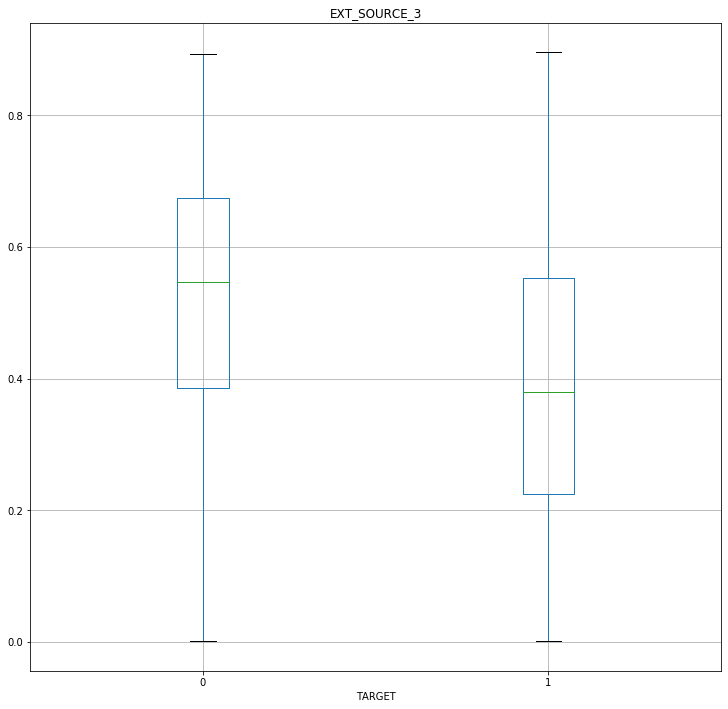

Correlation: nan


In [59]:
app_train.boxplot(column='EXT_SOURCE_3', by = 'TARGET', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'] , app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))